In [2]:
#To import all required modules for HW3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import scipy.io
import numpy as np
from glob import glob
import cv2
%matplotlib inline

(10, 400)
faces ids array shape (10,)


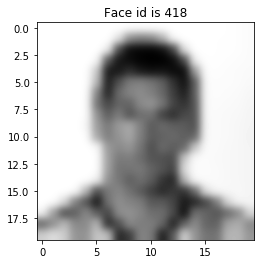

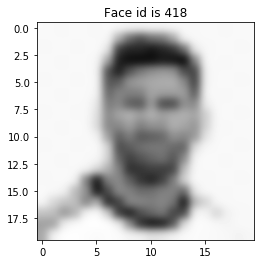

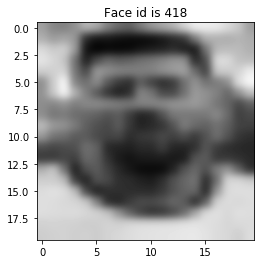

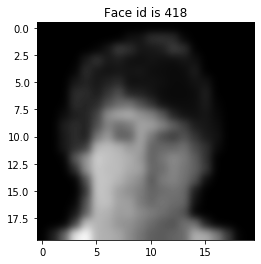

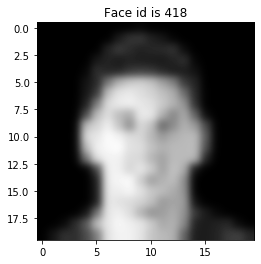

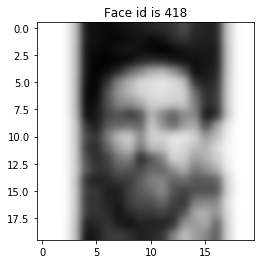

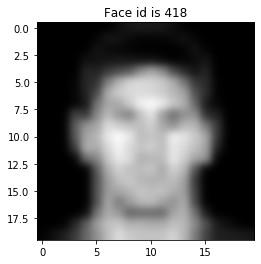

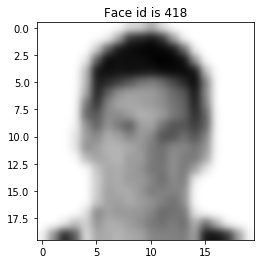

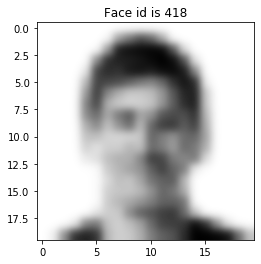

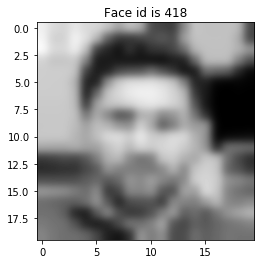

In [3]:
images_10 = [] 
images_10_ids = [418,418,418,418,418,418,418,418,418,418]
width = 20
height = 20
dim = (width, height)
#To loop through images in the dataset folder
for image in glob("dataset/messi/*.png"):
    #To read imag from dataset folder using cv2, cv2 reads images in BGR format
    imgBGR = cv2.imread(image)
    #To convert image into gray scale
    grayImage = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
    # resize image
    resized = cv2.resize(grayImage, dim, interpolation = cv2.INTER_AREA)
    #To save image in the images list to be used later by another functions
    data = np.asarray(resized.reshape(400,))
    images_10.append(data)
#To convert image list into an array
images_10_array = np.asarray(images_10)
print(images_10_array.shape)
faces_10_ids_array = np.asarray(images_10_ids)
print("faces ids array shape", faces_10_ids_array.shape)
#To show my 10 faces in the data set and it is label
for img in range(10):
    plt.imshow(images_10_array[img].reshape((20, 20)), cmap=plt.cm.gray, interpolation="gaussian")
    plt.title("Face id is " + str(faces_10_ids_array[img]), size=12)
    plt.show()


In [4]:

#To load and import data from the "faces-ids-n6680-m417-20x20.mat" mat file
#I used scipy library to load the data

dataset = scipy.io.loadmat('dataset/faces-ids-n6680-m417-20x20.mat')

#To get faces and faces id and store them in two different varaibles
faces = dataset['faces']

# Append 10 images to  faces dataset
faces_new = np.append(faces, images_10_array, axis=0)
print(faces_new[0].shape)
print(faces_new.shape)
faces_ids = dataset['ids']
faces_ids = np.append(faces_ids, faces_10_ids_array)
print(faces_ids.shape)
target = faces_ids
#convert data to float and scale values between 0 and 1
faces_new = faces_new.astype('float')

#scale data
faces_new /=255.0

(400,)
(6690, 400)
(6690,)


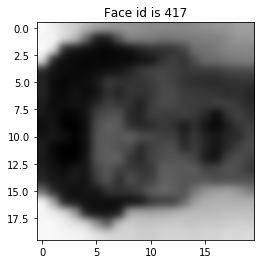

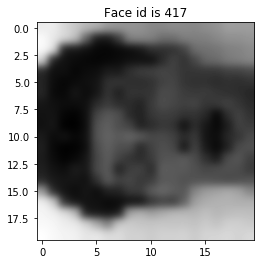

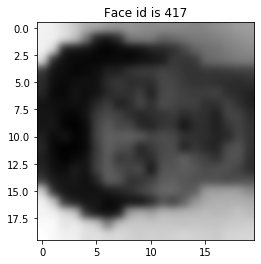

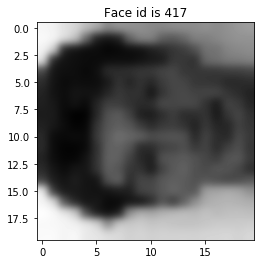

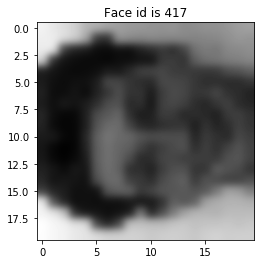

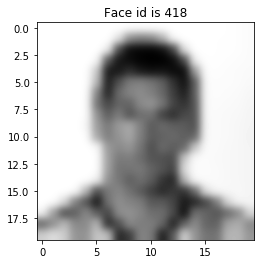

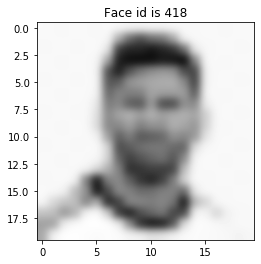

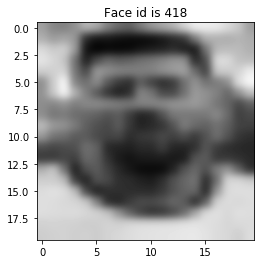

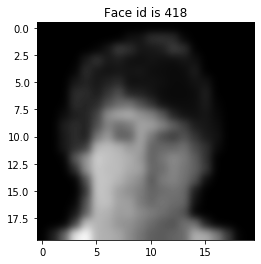

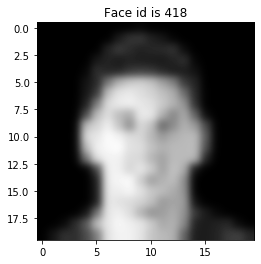

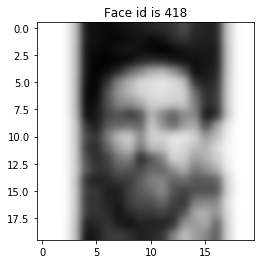

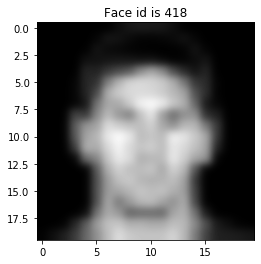

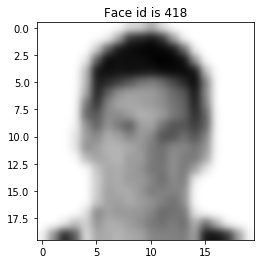

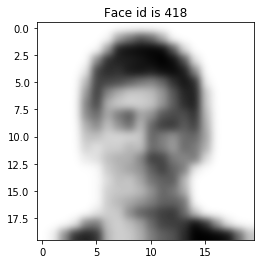

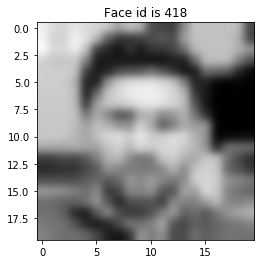

In [5]:
#To show first 10 faces in the data set and it is label
for i in range(6675,6690):
    
    plt.imshow(faces_new[i].reshape((20, 20)), cmap=plt.cm.gray, interpolation="gaussian")
    plt.title("Face id is " + str(faces_ids[i]), size=12)
    plt.show()

In [6]:
# To split data set into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(faces_new, faces_ids, test_size=0.10, random_state=42)


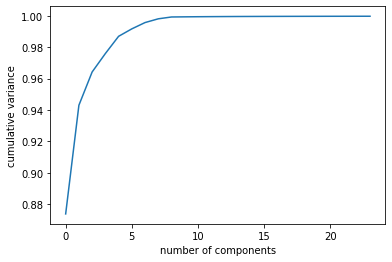

In [7]:
# Compute a PCA (eigenfaces) on the face dataset
n_components = 24
h = 20
w = 20

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

# To Project the input data on the eigenfaces
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#To compute LDA:
lda = LinearDiscriminantAnalysis().fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)



#To plot cumulative variance corrsponding to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()


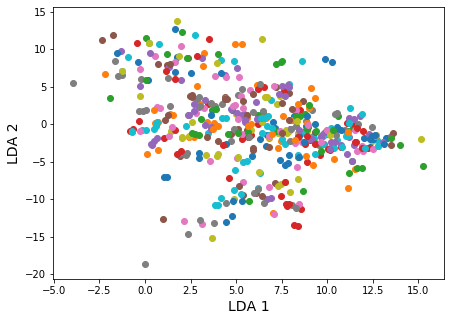

In [8]:
#To plot eigenface model 
first_xLDA = X_test_lda[:500, :1]
second_yLDA = X_test_lda[:500, 1:2]
faces_labels=y_test[:500]
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for label in np.unique(faces_labels):
 label_id=np.where(faces_labels==label)
 ax.scatter(first_xLDA[label_id],second_yLDA[label_id])
plt.xlabel("LDA 1",fontsize=14)
plt.ylabel("LDA 2",fontsize=14)
plt.show()


In [9]:
# To Train a SVM classification model


model = SVC(C=1000.0, kernel='rbf', degree=3, gamma=0.0005, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

#To train the model on the X_train_pca
model = model.fit(X_train_lda, y_train)



In [10]:
#To predict faces id on the test dataset
print("Predicting Face's id on the test set")

y_pred = model.predict(X_test_lda)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=range(417)))

Predicting Face's id on the test set
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         0
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         1
          14       0.75      1.00      0.86         3
          19       0.00      0.00      0.00         1
          23       0.67      1.00      0.80         2
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          29       1.00      0.50      0.67         2
          30       0.00      0.00      0.00 

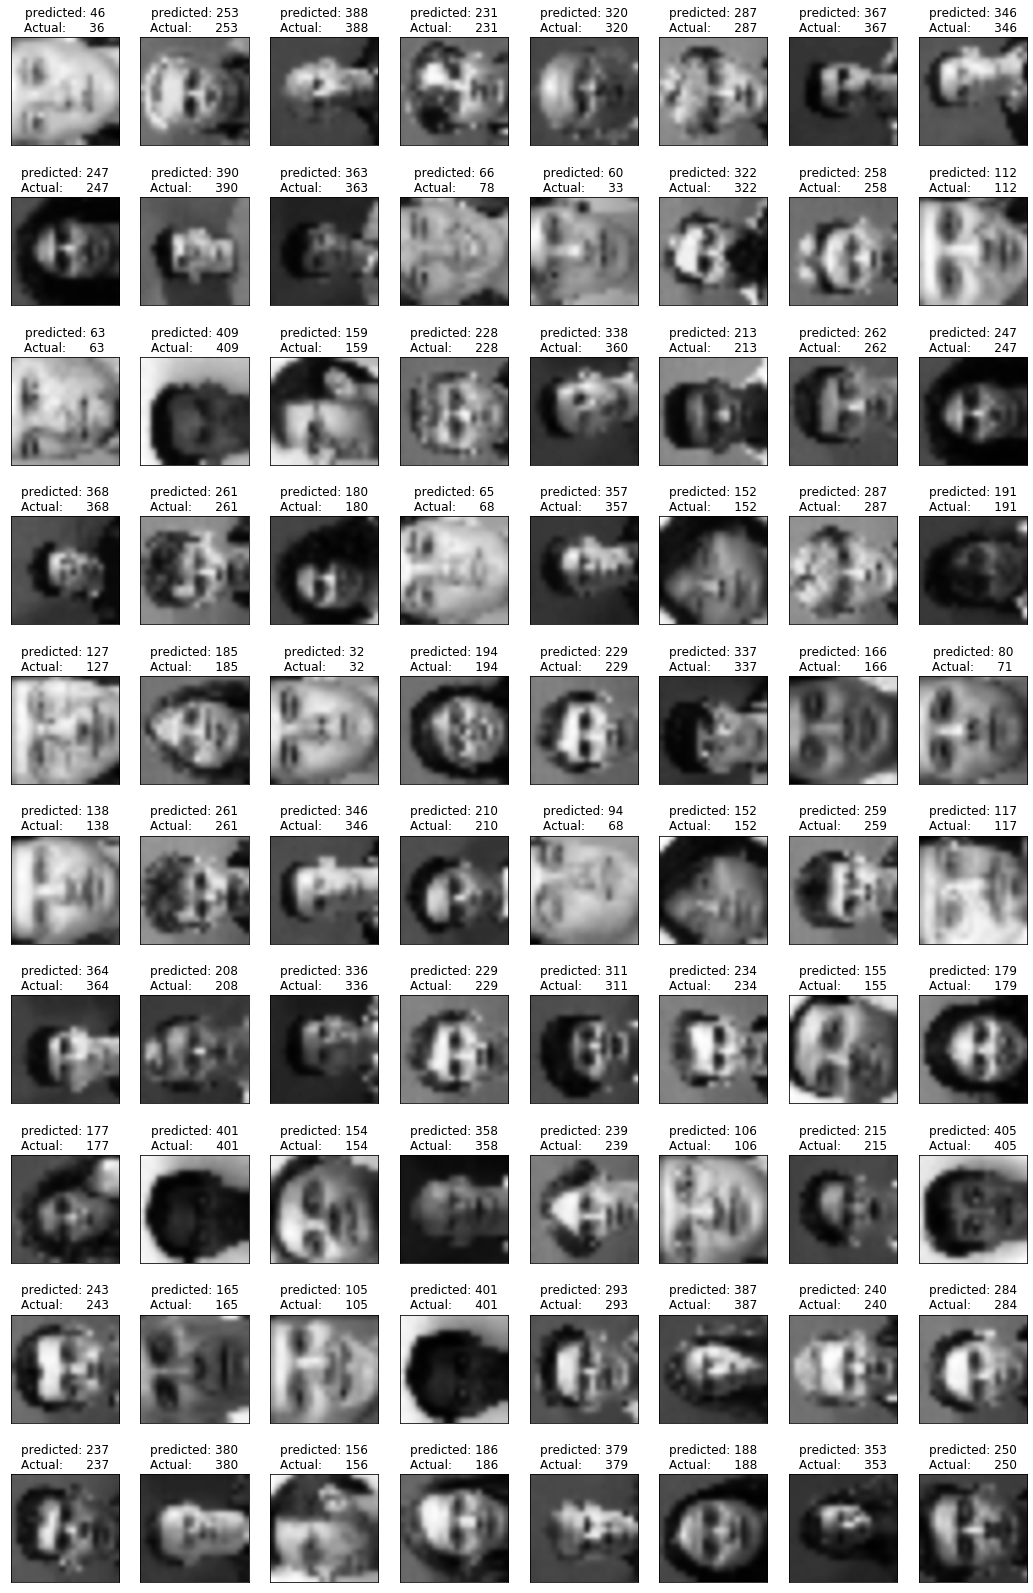

In [11]:
#To plot eigenfaces and test faces result 
def plot_faces(imgs, titles, h, w, n_row=10, n_col=8):
    
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(imgs[i].reshape((h, w)), cmap=plt.cm.gray, interpolation="gaussian")
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#To generate predicted an actual id for face in the plot
def provide_title(y_pred, y_test, i):
    pred_id = y_pred[i]
    true_id = y_test[i]
    return 'predicted: %s\nActual:      %s' % (pred_id, true_id)


prediction_titles = [provide_title(y_pred, y_test, i)
                     for i in range(y_pred.shape[0])]

#To plot faces from test dataset
plot_faces(X_test, prediction_titles, h, w)

plt.show()